<a href="https://colab.research.google.com/github/bastiansosa/procesamiento-digital/blob/main/prueba_procesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from skimage import data 
import matplotlib.pylab as plt
import skimage.io as io
# alumnos: Bastian Antil y Felipe Villa 

In [2]:
from skimage.morphology import (disk,square,erosion,dilation,closing,opening,area_closing,area_opening)

1) Descargar la imagen image_aerial.png desde el repositorio https://github.com/jorgevergara/PDI/blob/main/image_aerial.png Links to an external site.y utilice técnicas de procesamiento de imágenes para detectar el camión blanco en la carretera.

In [3]:
img = io.imread('https://raw.githubusercontent.com/jorgevergara/PDI/main/image_aerial.png', as_gray=True)
img=img/255

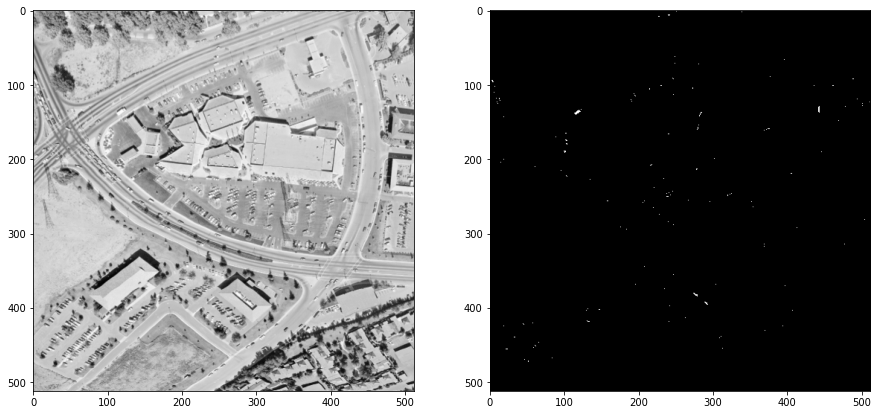

In [4]:
img_b = img>0.965 #Binarizar imagen
fig, ax = plt.subplots(1,2,figsize=(15,15))
ax[0].imshow(img,cmap="gray")
ax[1].imshow(img_b,cmap="gray")

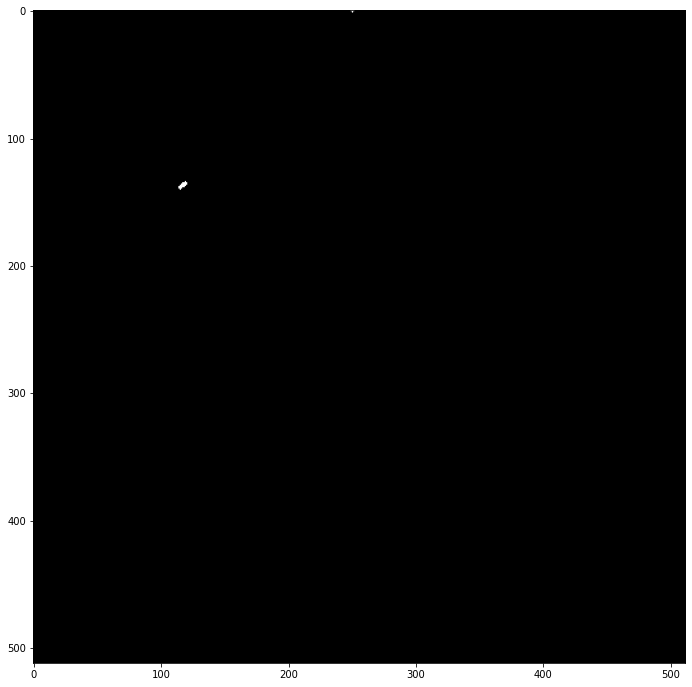

In [5]:
img_opening = opening(img_b,disk(1))
plt.figure(figsize=(12,12))
plt.imshow(img_opening,cmap="gray")

2) Utilizando la misma imagen en (1) utilice técnicas de erosión y/o dilatación para eliminar (o atenuar) los autos sobre la carretera.

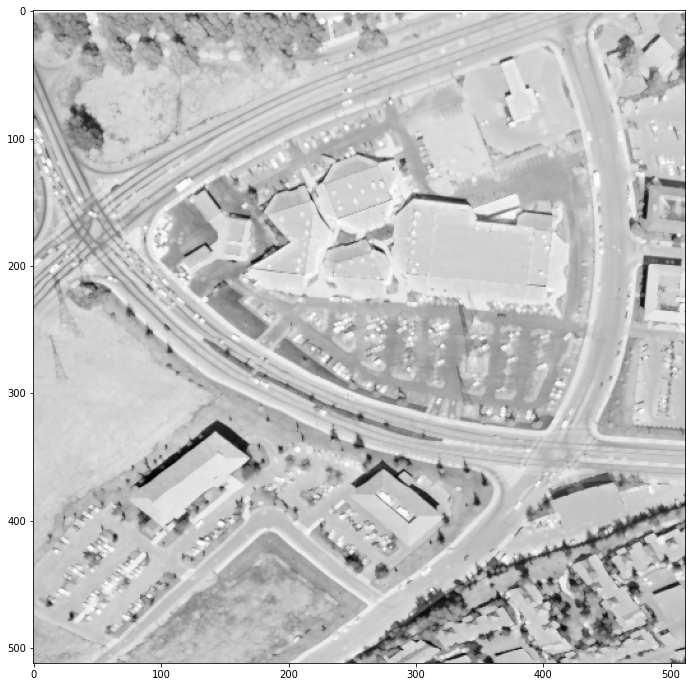

In [6]:
plt.figure(figsize=(12,12))
plt.imshow(dilation(img,disk(1)),cmap="gray")

3) Obtenga el histograma en cada canal (en cada uno de los 3 colores RGB) de la imagen parrot https://github.com/jorgevergara/PDI/blob/main/parrot.png

In [7]:
img_parrot = io.imread('https://raw.githubusercontent.com/jorgevergara/PDI/main/parrot.png')


(array([1.650e+03, 2.200e+02, 2.440e+02, 2.830e+02, 3.220e+02, 3.300e+02,
        3.200e+02, 3.180e+02, 3.760e+02, 3.560e+02, 3.520e+02, 3.600e+02,
        3.710e+02, 3.790e+02, 4.270e+02, 4.420e+02, 4.490e+02, 5.280e+02,
        5.440e+02, 6.770e+02, 7.340e+02, 8.040e+02, 1.016e+03, 1.147e+03,
        1.360e+03, 1.447e+03, 1.588e+03, 1.799e+03, 1.795e+03, 1.997e+03,
        1.943e+03, 1.818e+03, 1.752e+03, 1.561e+03, 1.598e+03, 1.440e+03,
        1.366e+03, 1.351e+03, 1.360e+03, 1.241e+03, 1.381e+03, 1.404e+03,
        1.389e+03, 1.300e+03, 1.375e+03, 1.402e+03, 1.370e+03, 1.414e+03,
        1.581e+03, 1.679e+03, 1.711e+03, 1.671e+03, 1.788e+03, 1.789e+03,
        1.864e+03, 1.911e+03, 1.870e+03, 1.746e+03, 1.729e+03, 1.855e+03,
        1.906e+03, 1.858e+03, 1.938e+03, 2.000e+03, 2.071e+03, 2.001e+03,
        2.023e+03, 1.936e+03, 1.943e+03, 1.862e+03, 1.750e+03, 1.704e+03,
        1.682e+03, 1.721e+03, 1.588e+03, 1.573e+03, 1.484e+03, 1.492e+03,
        1.395e+03, 1.297e+03, 1.313e+0

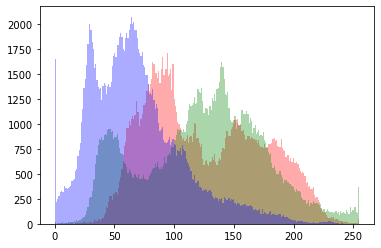

In [8]:
plt.figure()
plt.hist(img_parrot[:,:,0].ravel(), bins=256, range=(0,255), color='r', alpha=0.33)
plt.hist(img_parrot[:,:,1].ravel(), bins=256, range=(0,255), color='g', alpha=0.33)
plt.hist(img_parrot[:,:,2].ravel(), bins=256, range=(0,255), color='b', alpha=0.33)

4) Elimine los indicadores de minutos de la imagen clock2 https://github.com/jorgevergara/PDI/blob/main/clock2.jpg Links to an external site.  mediante estrategias de apertura y/o cerrado.

In [9]:
img2 = io.imread('https://raw.githubusercontent.com/jorgevergara/PDI/main/clock2.jpg', as_gray=True)


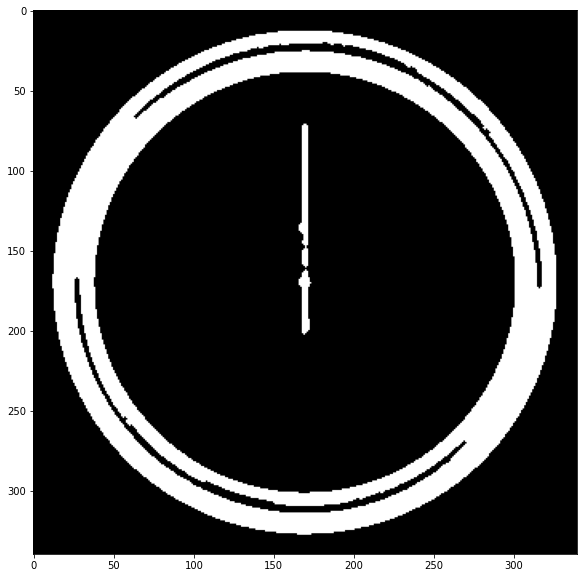

In [10]:
img22 = img2>0.7
img_f = opening(erosion(img22,disk(1)),disk(1))
plt.figure(figsize=(10,10))
plt.imshow(img_f,cmap="gray")

5) Encuentre un umbral óptimo para dejar solo a la gaviota en la imagen sea_bird.jpg https://github.com/jorgevergara/PDI/blob/main/sea_bird.jpg

In [3]:
from skimage.filters import (gaussian, sobel, median, inverse)
from skimage.exposure import (histogram,adjust_gamma,adjust_log,equalize_hist)
from scipy import ndimage as ndi

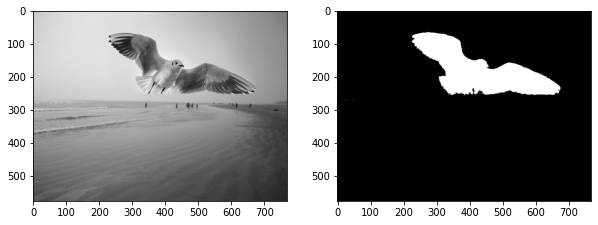

In [4]:
img3 = io.imread('https://raw.githubusercontent.com/jorgevergara/PDI/main/sea_bird.jpg',as_gray=True)
fig,ax = plt.subplots(1,2,figsize=(10,10))
img3_sobel = sobel(img3)
img3_b = img3_sobel>0.026
img3_b[270:576,:768]=0
img3_bb = ndi.binary_fill_holes(img3_b)
ax[0].imshow(img3,cmap="gray")
ax[1].imshow(img3_bb,cmap="gray")

6) Elimine la gaviota de la imagen anterior. Para ello utilice el negativo de la imagen binarizada y multiple con la imagen original. Por otro lado, multiple la imagen binarizada por una imagen con el color promedio de la imagen original. Luego sume ambas imágenes.

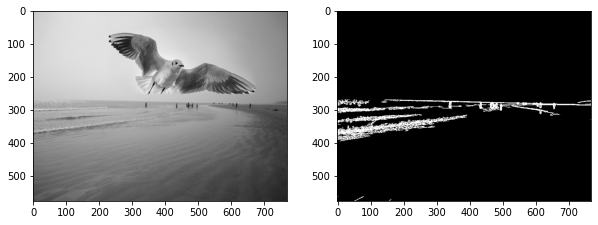

In [11]:
fig,ax=plt.subplots(1,2,figsize=(10,10))
img3_sobel = sobel(img3)
img3_b = img3_sobel>0.026
ax[0].imshow(img3,cmap="gray")
ax[1].imshow(ndi.binary_fill_holes(1-img3_b),cmap="binary")